In [1]:
import os
import random
import string
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [2]:
def generate_random_words(num_words):
    words = set()
    while len(words) < num_words:
        word_length = random.randint(4, 7)
        word = ''.join(random.choices(string.ascii_lowercase, k=word_length))
        words.add(word)
    return list(words)

random_words = generate_random_words(100)
print(random_words)

In [ ]:
output_dir = "../Task1/train"
font_path = "roboto-regular.ttf"
font_size = 20

os.makedirs(output_dir, exist_ok=True)

for word in random_words:
    
    img = Image.new("RGB", (128, 128), color="white")
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_path, font_size)

    spaced_word = ''.join(word)

    text_width, text_height = draw.textbbox((0, 0), spaced_word, font=font)[2:]
    position = ((200 - text_width) // 2, (100 - text_height) // 2)

    x_position = (img.width - text_width) // 2
    y_position = (img.height - text_height) // 2

    cap = spaced_word.capitalize()
    draw.text((x_position,y_position), cap, fill="black", font=font)

    word_dir = os.path.join(output_dir, word)
    os.makedirs(word_dir, exist_ok=True)

    # plt.imshow(img)
    # break

    img.save(os.path.join(word_dir, "easy.png"))

Easy set images saved in the folder: ../Task1/multichar-train


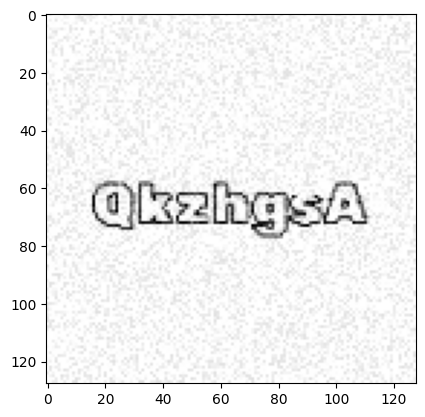

In [4]:
noise_level = 30

font_paths = [
    'RubikIso-Regular.ttf',
    # 'Delius-Regular.ttf',
]

output_dir2 = "../Task1/test"
os.makedirs(output_dir2, exist_ok=True)

def add_noise_to_image(image, noise_level):

    pixels = image.load()

    for i in range(image.size[0]):
        for j in range(image.size[1]):

            noise = random.randint(-noise_level, noise_level)
            r, g, b = pixels[i, j]
            pixels[i, j] = (
                min(255, max(0, r + noise)),
                min(255, max(0, g + noise)),
                min(255, max(0, b + noise))
            )

    return image

def random_capitalize(word):
    return ''.join([letter.upper() if random.random() > 0.5 else letter.lower() for letter in word])


for word in random_words:
    for i in range(5):
        
        word_with_caps = random_capitalize(word)

        img = Image.new("RGB", (128, 128), color=(255, 255, 255))
        draw = ImageDraw.Draw(img)

        total_width = 0
        font_path = font_paths[0]
        font = ImageFont.truetype(font_path, font_size)

        for letter in word_with_caps: 
            letter_bbox = font.getbbox(letter) 
            total_width += letter_bbox[2] - letter_bbox[0]

        _, y_min, _, y_max = font.getbbox("Ay")
        text_height = y_max - y_min

        x_position = (img.width - total_width) // 2
        y_position = (img.height - text_height) // 2

        for letter in word_with_caps:

            draw.text((x_position, y_position), letter, font=font, fill="black")

            letter_bbox = font.getbbox(letter)
            letter_width = letter_bbox[2] - letter_bbox[0]

            x_position += letter_width

        img = add_noise_to_image(img, noise_level)

        # plt.imshow(img)
        # break

        word_dir = os.path.join(output_dir2, word)
        os.makedirs(word_dir, exist_ok=True)
        img.save(os.path.join(word_dir, f"hard{i}F1.png"))